In [49]:
from music21 import *
from IPython.display import Image


def music(info: list, notes: str, midi=False):
    s = stream.Score()
    part = stream.Part()
    if info[0] == "Treble":
        part.append(clef.TrebleClef())
    elif info[0] == "Bass":
        part.append(clef.BassClef)
    elif info[0] == "None":
        part.append(clef.NoClef())
    part.append(key.KeySignature(info[1]))
    part.append(meter.TimeSignature(info[2]))

    split_notes = notes.split(" ")
    for n in split_notes:
        if n[0] == "!":
            part.append(harmony.ChordSymbol(n[1:]))
        elif n == "^":
            part.append(layout.SystemLayout(isNew=True))
        else:
            is_chord = False
            is_tie = "none"
            note_and_length = n.split("/")
            if "(" in note_and_length[0]:
                is_chord = True
                chord_name = (
                    note_and_length[0].replace("(", "").replace(")", "").split("$")
                )
            else:
                note_name = note_and_length[0]
            if "{" in note_and_length[1]:
                is_tie = "start"
                note_and_length[1] = note_and_length[1].replace("{", "")
            if "}" in note_and_length[1]:
                is_tie = "stop"
                note_and_length[1] = note_and_length[1].replace("}", "")
            if "*" in note_and_length[1]:
                length_and_col = note_and_length[1].split("*")
                note_length = length_and_col[0]
                note_col = length_and_col[1]
            else:
                note_length = note_and_length[1]
                note_col = ""
            if note_length in ["0.3", ".3"]:
                note_length = 0.333333333
            else:
                note_length = float(note_length)
            if is_chord:
                add_n = chord.Chord(chord_name, quarterLength=note_length)
            else:
                if note_name.lower() == "r":
                    add_n = note.Rest(quarterLength=note_length)
                elif note_name in ["slash", "s"]:
                    add_n = note.Unpitched()
                    add_n.notehead = "slash"
                    add_n.stemDirection = "noStem"
                    add_n.volume.velocity = 0
                else:
                    add_n = note.Note(note_name, quarterLength=note_length)
            if is_tie != "none":
                add_n.tie = tie.Tie(is_tie)
            if note_col != "":
                add_n.style.color = note_col

            part.append(add_n)

    s.append(tempo.MetronomeMark(number=120))
    s.append(part)
    if midi:
        return s.show("midi")
    else:
        return Image(filename=s.write("musicxml.png"))

# Coltrane:<br>A Player's Guide to His Harmony
by Walt Weiskopf and Ramon Ricker

## Introduction
Contemporary  jazz  players  have  roots  in  tradition  but  at  the  same  time  they  continually  look  for  new techniques  to  vary  their  improvisation.  While  recognizing  the  components  of  Bebop,  Swing,  Dixieland and  Black  spiritual  music  in  jazz  today,  the  contemporary  player  also  needs  to  be  familiar  with  more recent  innovations  in jazz  harmony.  An  important  mainstay  of  modern  jazz  is  the  music  of John  Coltrane.

The  objective  of  this  book  is  to  help  jazz  instrumentalists  better  understand  some  of  Coltrane’s  music. Having  studied  this  interpretation  and  analysis  of  Coltrane’s  technique,  the  aspiring  improviser  can hopefully  begin  to  incorporate  some  of “Trane’s”  techniques  into  his  ocherown  playing.  While  this  book will  be  of  particular  interest  to  saxophonists,  it  is  intended  for  all  instrumentalists.  A  basic  assumption made  by  the  authors  is  that  the  reader  has  an  understanding  of  fundamental  theoretical  concepts  used  in jazz.  If  there  is  a  question  about  terminology  please  refer  to  a  comprehensive  jazz  theory  book  such  as: *The  Jazz  Language*  by  Dan  Haerle.  In  addition,  the  following  tracks  in  the  *Jamey  Aebersold  Play-Along Series*  are  very  valuable  for  putting  the  information  in  this  book  to  use:
- Volume 16: Turnarounds, Cycles and II-V7s
  - *Turnaround Number 3, Coltrane Changes, Coltrane Blues, Guess What Key I'm In*
- Volume 28: John Coltrane
  - 26-2, *Giant Steps, Countdown*

# Keys, Tonics, and Tonicization
As  an  important  preface,  let  us  review  some  basic  elements  common  to  most  jazz  and  standard  tunes. Most  tunes  (excluding  “free  pieces”),  can  usually  be  analyzed  to  be  ina  particular  key.  During  the  course of  a  tune,  the  chord  progression  may  venture,  or  modulate,  from  its  original  key  to  a  different  key,  but most  often  it  returns  to  the  tonic.  While  this  is  a  typical  example,  there  are,  of course,  many  exceptions. Some  tunes  begin  in  one  key  and  end  in  another,  but  for  the  purpose  of  this  discussion,  we  will  examine tunes  that  start  and  end  in  the  same  key.

The  key  of  a  tune  is  usually  referred  to  as  the  **tonic**.  As  mentioned  above,  a  tune  may  begin  in  one  key but briefly  modulate  to  another key.  When  this  occurs  the  chord  progression  is  said  to  **tonicize**  the  foreign key.  Therefore,  to  tonicize  is  to  establish  a  key  as  tonic  for  a  short  duration.  This  tonicization  is appropriately  called  by  some,  “the  key  of  the  moment.”  A  tune  may  have  one  or  more  of  these tonicizations  (or  keys  of  the  moment),  before  returning  to  the  original  tonic  key  (assuming,  as  we generally  will,  that  it  returns  to  the  tonic  key).  A  typical  chord  progression  to  a  standard  or jazz  tune  is given  on  the  following  page.  (Ex.  1)

In  this  example  we  begin  in  the  key  of  F,  then  tonicize  a  foreign  key  in  measure  twelve  (A  major),  before returning  to  the  tonic  key  in  measure  seventeen  (the  key  of  the  tune,  F  major).  The  most  basic  way  of tonicizing  a  key  is  with  its  “V”  chord  (the  chord  built  on  the  fifth  note  of  the  corresponding  major  scale). For  example,  F  major  can  be  tonicized  with  its  “V”  chord  (C7).  Very  often  in  jazz  a“V”  is  preceded by  a  “II”  chord  (a  minor  chord  built  on  the  second  degree  of  the  tonic  scale).  In  our  exampie,  the  second degree of  the  tonic  scale  is  G  since  we  are  in  the  key  of F, so.a“II-V-I”  tonicization  in  F  would  be  Gmin7, followed  by  C7,  resolving  to  the  tonic,  F  major.

EXAMPLE I. TYPICAL CHORD PROGRESSION


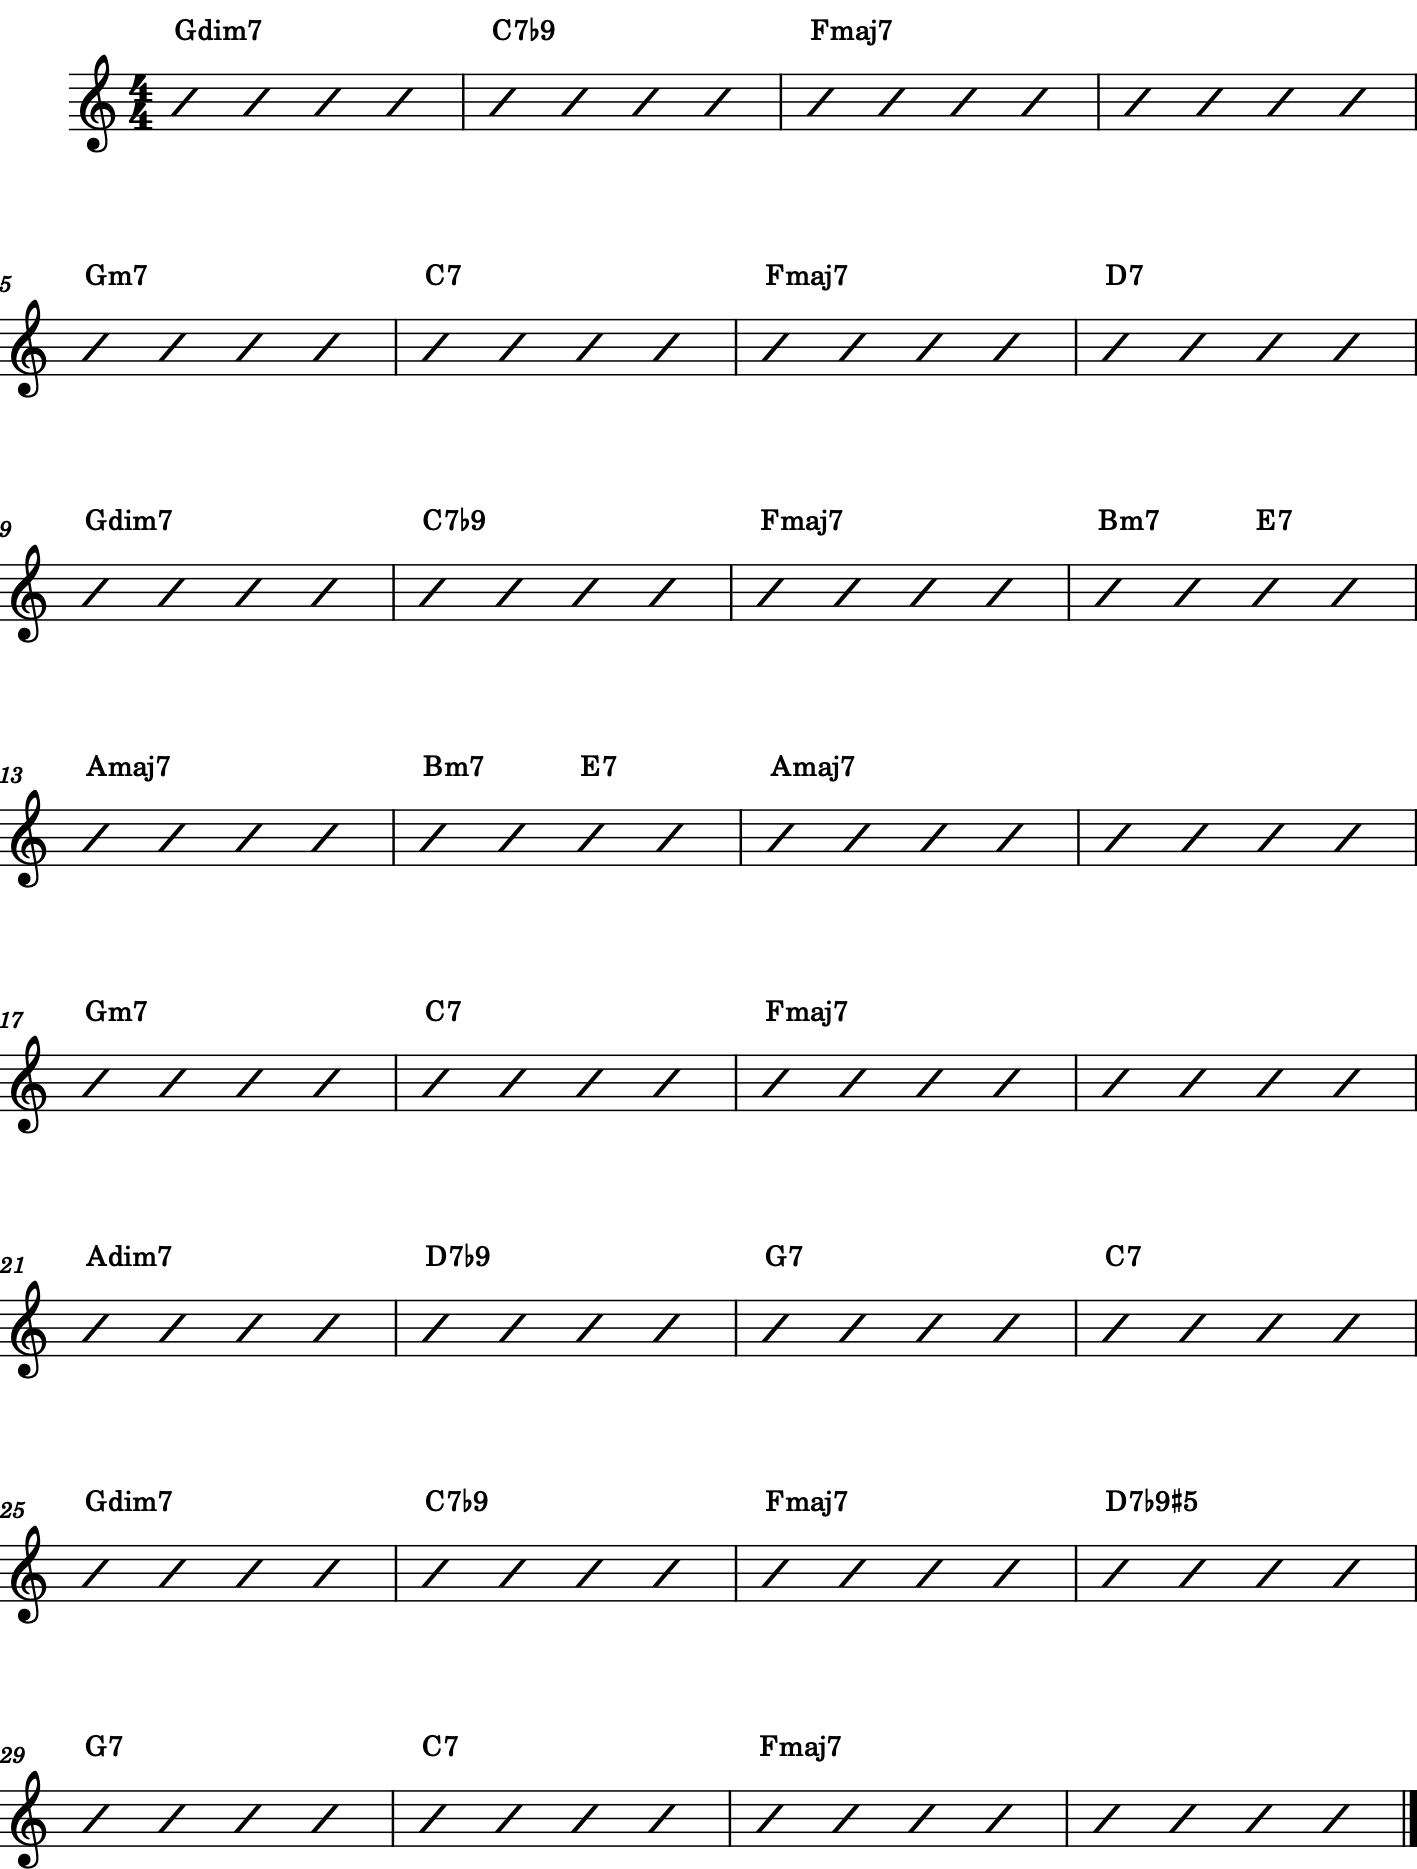

In [50]:
info = ["Treble", 0, "4/4"]
notes = "!gdim7 s/1 s/1 s/1 s/1 !c7b9 s/1 s/1 s/1 s/1 !fmaj7 s/1 s/1 s/1 s/1 s/1 s/1 s/1 s/1 ^ "
notes += "!gm7 s/1 s/1 s/1 s/1 !c7 s/1 s/1 s/1 s/1 !fmaj7 s/1 s/1 s/1 s/1 !d7 s/1 s/1 s/1 s/1 ^ "
notes += "!gdim7 s/1 s/1 s/1 s/1 !c7b9 s/1 s/1 s/1 s/1 !fmaj7 s/1 s/1 s/1 s/1 !bm7 s/1 s/1 !e7 s/1 s/1 ^ "
notes += "!amaj7 s/1 s/1 s/1 s/1 !bm7 s/1 s/1 !e7 s/1 s/1 !amaj7 s/1 s/1 s/1 s/1 s/1 s/1 s/1 s/1 ^ "
notes += "!gm7 s/1 s/1 s/1 s/1 !c7 s/1 s/1 s/1 s/1 !fmaj7 s/1 s/1 s/1 s/1 s/1 s/1 s/1 s/1 ^ "
notes += "!adim7 s/1 s/1 s/1 s/1 !d7b9 s/1 s/1 s/1 s/1 !g7 s/1 s/1 s/1 s/1 !c7 s/1 s/1 s/1 s/1 ^ "
notes += "!gdim7 s/1 s/1 s/1 s/1 !c7b9 s/1 s/1 s/1 s/1 !fmaj7 s/1 s/1 s/1 s/1 !d7b9#5 s/1 s/1 s/1 s/1 ^ "
notes += "!g7 s/1 s/1 s/1 s/1 !c7 s/1 s/1 s/1 s/1 !fmaj7 s/1 s/1 s/1 s/1 s/1 s/1 s/1 s/1"
print("EXAMPLE I. TYPICAL CHORD PROGRESSION")
music(info, notes, True)
music(info, notes, False)

Next  is  an  example  of  the  use  of  the  I-V-1  progression  in  a  12-bar  Blues.  (Blues 
progressions  can  vary  from  basic  to  complex.  The  one  given  here  is  a  standard  Blues  progression  in  the key  of  F.)  (Ex.  2)  Note  the  use  of  the  II-V  progression  in  measures  4-5,  8-9,  9-11,  and  12-1.  By  using II-V-I’s,  the  harmonic  rhythm,  or  speed  at  which  the  chords  move  is  increased.  This  provides  interest and  a  more  flowing  movement  from  one  key  to  the  next.

EXAMPLE 2. COMMON BLUES PROGRESSION


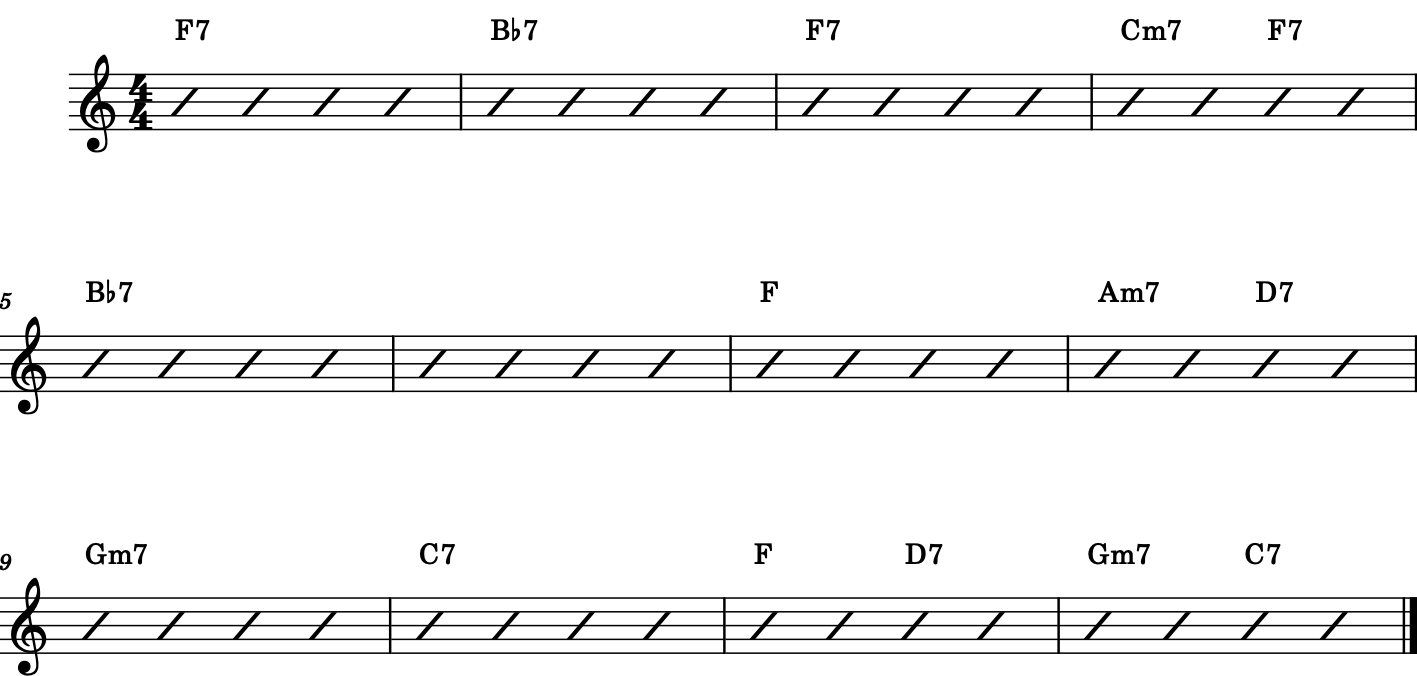

In [51]:
info = ["Treble", 0, "4/4"]
notes = "!f7 s/1 s/1 s/1 s/1 !b-7 s/1 s/1 s/1 s/1 !f7 s/1 s/1 s/1 s/1 !cm7 s/1 s/1 !f7 s/1 s/1 ^ "
notes += "!b-7 s/1 s/1 s/1 s/1 s/1 s/1 s/1 s/1 !f s/1 s/1 s/1 s/1 !am7 s/1 s/1 !d7 s/1 s/1 ^ "
notes += "!gm7 s/1 s/1 s/1 s/1 !c7 s/1 s/1 s/1 s/1 !f s/1 s/1 !d7 s/1 s/1 !gm7 s/1 s/1 !c7 s/1 s/1"
print("EXAMPLE 2. COMMON BLUES PROGRESSION")
music(info, notes, True)
music(info, notes, False)

One  must  always  keep  in  mind  that  a  II-V  may  exist  by  itself  without  resolving  to  I,  but  it  is  helpful  to think  of  the  II-V  as  being  in  the  key  of  the  I;  i.e.,  the  progression  Gmin7  to  C7  is,  in  a  sense,  in  the  key of  F,  even  if  it  does  not  actually  resolve  to  F.  It  is  equally  important  to  remember  that  any  chord  can  be tonicized,  not  just  the  I  chord  or  the  IV  chord.  For  example,  in  measures  8  and  9  of  our  Blues  example, Gmin7  is  tonicized  with  a  II-V  (Amin7,  D7).

The  sixteen  bar  jazz  standard  *Tune-up*  by  saxophonist  Eddie  Vinson  (often  attributed  to  Miles  Davis), is  a  Classic  example  of  the  use  of  the  II-V.  This  tune  uses  the  basic  II-V-I  progression  in  three  different keys.  Measures  1-4  is  a  II-V-I  in  D,  measures  5-8  is  a  II-V-I in  C  and  bars  9-12  is  a  II-V-I  in  B-flat.  In the  late  1950’s,  Coltrane  developed  his  own  approach  to  playing  on  this  chord  progression.  The  first  four measures  of  the  chord  progression  to  Coltrane’s  variation  of  Tune-Up,  called  Countdown  is  given  in example  3.

EXAMPLE 3. FIRST FOUR MEASURES OF THE CHORD PROGRESSIONS OF TUNE-UP AND COUNTDOWN

TUNE UP


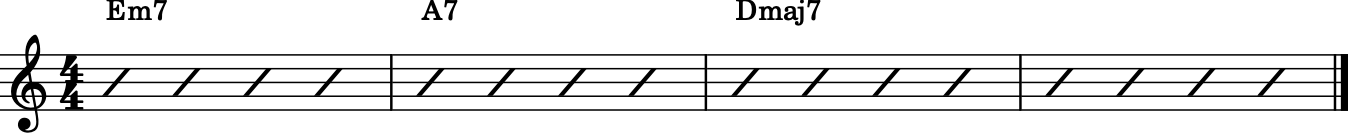

In [53]:
info = ["Treble", 0, "4/4"]
notes = "!em7 s/1 s/1 s/1 s/1 !a7 s/1 s/1 s/1 s/1 !dmaj7 s/1 s/1 s/1 s/1 s/1 s/1 s/1 s/1"
print("EXAMPLE 3. FIRST FOUR MEASURES OF THE CHORD PROGRESSIONS OF TUNE-UP AND COUNTDOWN")
print("")
print("TUNE UP")
music(info, notes, True)
music(info, notes, False)

COUNTDOWN


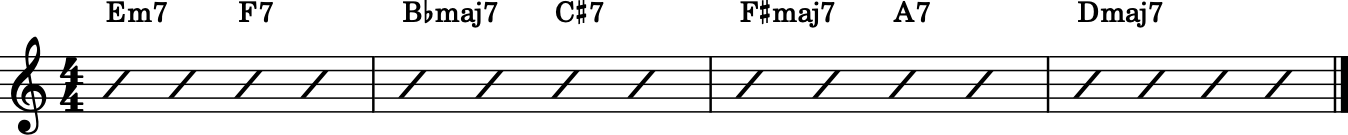

In [54]:
notes = "!em7 s/1 s/1 !f7 s/1 s/1 !b-maj7 s/1 s/1 !c#7 s/1 s/1 !f#maj7 s/1 s/1 !a7 s/1 s/1 !dmaj7 s/1 s/1 s/1 s/1"
print("COUNTDOWN")
music(info, notes, True)
music(info, notes, False)

Look  at  example  three.  Notice  that  both  progressions  start  with  the  If  chord  (Emin7),  and  end  with  the tonic  chord,  D,  preceded  by  its  dominant,  A7.  What  is  of  interest  in  this  discussion  is  **how**  Coltrane’s music  gets  to  D  major. 

In  the  first  four  measures,  *Countdown*  tonicizes  two  other  keys  on  the  way  to  D  major:  first  B-flat  in measure  two,  preceded  by  its  V  chord  in  measure  one;  and  second,  F-sharp  in  measure  three,  preceded by  its  V  chord in  measure  two.  These  three  key  centers;  D,  B-flat  and  F-sharp  are  all  related  by  a common interval - the  major  third.  The  first  four  measures  of  *Tune-Up*  use  a  simple  II-V-I  progression,  while Coltrane, in  *Countdown*,  uses  a  **cycle  of  descending  major  thirds**. 

Herein  lies  the  essence  of  this  historical  phase  of  Coltrane’s  harmonic  technique.  **Trane’s  changes  are derived  from  the  basic  II-V-I  progression  and  utilize  a  cycle  of  descending  major  thirds**.  Before we  continue  with  the  discussion  of specific  tunes,  it  will  be  helpful  to  understand  the  construction  of  the **cycle  of  descending  major  thirds**.